In [280]:
import numpy as np
import pandas as pd
from IPython.display import clear_output


df = pd.read_excel("../514Data/Concrete_Data.xls")
df.rename(columns={'Concrete compressive strength(MPa, megapascals) ': 'Strength'}, inplace=True)
mask = np.random.rand(len(df)) < 0.8
test = df[~mask]
df = df[mask]



In [281]:
def gradient(n,x,y_real,y_pred):
    return 1/n *(np.sum(-2 * x * (y_real-y_pred)))
def forward(x,m,b):
    return x * m + b
def MSE(y,y_pred):
    return np.sum((y-y_pred)**2)/len(y)
def r2(y,y_pred):
    return 1 - (MSE(y,y_pred)/np.var(y))

In [286]:
for column in df.columns:
    if column != "Strength":
        df[column] = (df[column]- np.mean(df[column]))/ np.std(df[column])
        test[column] = (test[column]- np.mean(test[column]))/ np.std(test[column])

In [287]:
result = ""
def print_cool(stringer):
    print(result)
    print()
    print(stringer)
    clear_output(wait=True)

In [288]:
def fit(X,Y,alpha=1e-5,max_iter=1e5,m=np.array([0]),b=0,epsilon=1e-10,momentum = False):
    error = 0
    old_error = np.inf
    count = 0
    VE = -1000

    n = len(X)
    while count < max_iter:

        old_error = error
        count = count + 1
        y_pred = forward(X,m,b)
        error = MSE(Y,y_pred)
        VE = r2(Y,y_pred)
        if momentum:
            if old_error < error:
                alpha  = max(alpha * .5, 1e-64)
            else:
                alpha = alpha * 1.01
        m =  m - alpha * gradient(n,X,Y,y_pred)
        b = b - alpha * gradient(n,1,Y,y_pred)
        if count % 1000 == 0:
            print_cool(f"Count: {count}, MSE: {error}, VE: {VE}, \nm: {round(m,3)}, b: {round(b,3)},\nlr: {alpha},\nDifference: {abs(error-old_error)}")
            clear_output(wait=True)

        

    #print(f"Count: {count}, MSE: {error}, VE: {VE}")
    return error,VE,m,b
    

In [291]:
result = ""
for column in df.columns:
    if column != "Strength":
        error,VE,m,b = fit(df[column],df["Strength"],alpha=1e-12,max_iter=1e4,epsilon=1e-12,momentum=True)
        result=result+"\n" +f"Name: {column}, \nMSE: {error}, \nVE: {VE}\nm:{m}, b: {b}\n\n"
        
        #print(f"Name: {column}, MSE: {error}, VE: {VE}")


Name: Cement (component 1)(kg in a m^3 mixture), 
MSE: 209.93311271789395, 
VE: 0.2388550325055111
m:8.11659694627436, b: 35.926337447257914


Name: Blast Furnace Slag (component 2)(kg in a m^3 mixture), 
MSE: 269.7012311369751, 
VE: 0.022156475701705425
m:2.472049273202442, b: 35.92633745814769


Name: Fly Ash (component 3)(kg in a m^3 mixture), 
MSE: 272.41279678636596, 
VE: 0.012325275080971365
m:-1.8437629862835054, b: 35.9263374044466


Name: Water  (component 4)(kg in a m^3 mixture), 
MSE: 250.24473272985654, 
VE: 0.09269901973354333
m:-5.0564341192079825, b: 35.9263374480472


Name: Superplasticizer (component 5)(kg in a m^3 mixture), 
MSE: 233.18982880530172, 
VE: 0.15453421154876212
m:6.528585600310295, b: 35.92633745804069


Name: Coarse Aggregate  (component 6)(kg in a m^3 mixture), 
MSE: 266.7166483135599, 
VE: 0.03297754231050498
m:-3.015892973722323, b: 35.926337451015165


Name: Fine Aggregate (component 7)(kg in a m^3 mixture), 
MSE: 268.78607040925186, 
VE: 0.02547453

In [292]:
import matplotlib.pyplot as plt
m = 8.11659694627436
b = 35.926337447257914
title = df.columns[0]
X = df[df.columns[0]]
Y = df["Strength"]

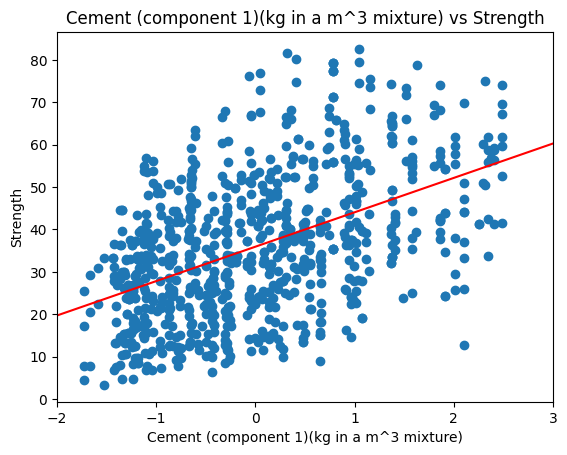

In [299]:
plt.scatter(X,Y)
p1=(-4,4)
p2=(-4*m + b,4*m + b)
plt.xlabel(title)
plt.ylabel("Strength")
plt.title(f"{title} vs Strength")
plt.xlim((-2,3))
plt.plot(p1,p2, color = "red")

In [301]:
X = test[test.columns[0]]
Y = test["Strength"]
y_pred = forward(X,m,b)
print(f"MSE: {MSE(Y,y_pred)}, VE {r2(Y,y_pred)}")

MSE: 209.3446457586348, VE 0.2833362541426869


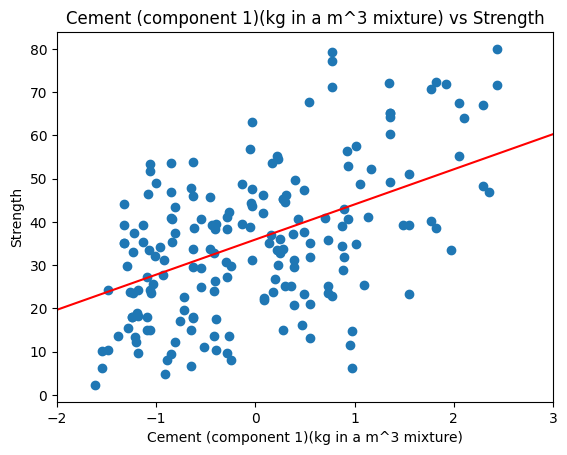

In [302]:
plt.scatter(X,Y)
p1=(-4,4)
p2=(-4*m + b,4*m + b)
plt.xlabel(title)
plt.ylabel("Strength")
plt.title(f"{title} vs Strength")
plt.xlim((-2,3))
plt.plot(p1,p2, color = "red")

In [ ]:
m=np.ones(3)
b = 1.0
x = [3,4,5]
y= 4
fit(x,y,m)